<a href="https://colab.research.google.com/github/sadavarterohit/EIBEC3-Diffusion/blob/main/TVAE_philly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas sdv openpyxl


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/city_payments_sector_label_fy2017.csv", header=0)

# Drop the 'ID' column if present
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

print(data.shape)
data.head()



(238894, 18)


,Unnamed: 0,fy,fm,check_date,document_no,dept,department_title,char_,character_title,sub_obj,sub_obj_title,vendor_name,doc_ref_no_prefix,doc_ref_no_prefix_definition,contract_number,contract_description,transaction_amount,sector
0,0,2017,10,2017-04-12,CHEK17119771,42,42 COMMERCE,2,02 PURCHASE OF SERVICES,231,OVERTIME MEALS 0231,EAT AT JOE'S,PVXX,payment voucher,NaN,NaN,66.82,Accommodation and Food Services
1,1,2017,12,2017-06-09,ACHD17177233,26,26 LICENSES & INSPECTIONS,2,02 PURCHASE OF SERVICES,211,TRANSPORTATION 0211,L & I Â TRAVEL IMPREST FUND,PVXX,payment voucher,NaN,NaN,127.33,Unknown
2,2,2017,5,2016-11-25,CHEK17063736,44,44 LAW,2,02 PURCHASE OF SERVICES,258,COURT REPORTERS 0258,"MARLENE BELL REPORTING, INC.",PVXX,payment voucher,NaN,NaN,454.20,"Professional, Scientific, and Technical Services"
3,3,2017,1,2016-07-07,CHEK17000247,11,11 POLICE,2,02 PURCHASE OF SERVICES,260,REPAIR AND MAINTENANCE CHARGES 0260,RICOH AMERICAS CORPORATION,VCXX,procurement,NaN,NaN,50.00,Information
4,4,2017,1,2016-07-08,ACHD17000233,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,313,FOOD 0313,PHILADELPHIA PRISONS,PCXX,petty cash,NaN,NaN,71.92,Public Administration (government agencies and...


In [ ]:
cat_attrs = ['fm', 'department_title', 'character_title', 'sub_obj_title', 'vendor_name']
num_attrs = ['transaction_amount']
train = data[cat_attrs+num_attrs].copy()
train['fm'] = train['fm'].astype(str)

# Sample 100,000 rows from the cleaned dataset
train = train.sample(n=100000, random_state=42)
train

,fm,department_title,character_title,sub_obj_title,vendor_name,transaction_amount
70142,12,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,15.84
146071,5,44 LAW,02 PURCHASE OF SERVICES,COURT REPORTERS 0258,ERSA COURT REPORTERS,202.25
154875,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,EMILY CHERNIACK,250.00
154799,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,GARY SANFORD SERVER,150.00
228979,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,16.96
...,...,...,...,...,...,...
195545,7,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,RENTS 0285,XEROX CORPORATION,242.48
218523,9,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,LUE FRIERSON,250.00
199838,8,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,RENTS 0285,UNIFIRST,10.30
187750,7,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,FIRE LINE EQUIPMENT,160.61


In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train)

# Optional: You can review the inferred metadata
metadata.to_dict()


{'columns': {'fm': {'sdtype': 'categorical'},
  'department_title': {'sdtype': 'categorical'},
  'character_title': {'sdtype': 'categorical'},
  'sub_obj_title': {'sdtype': 'categorical'},
  'vendor_name': {'sdtype': 'categorical'},
  'transaction_amount': {'sdtype': 'numerical'}},
 'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1'}

In [ ]:
from sdv.single_table import TVAESynthesizer

# Initialize synthesizer
tvae = TVAESynthesizer(metadata)

# Fit model on real data
tvae.fit(train)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:145: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:123: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



In [ ]:
# Generate synthetic samples (same size as original)
synthetic_data = tvae.sample(num_rows=len(train))

# Preview
print(synthetic_data.shape)
synthetic_data.head()


(100000, 6)


,fm,department_title,character_title,sub_obj_title,vendor_name,transaction_amount
0,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,-56.43
1,11,25 FLEET MANAGEMENT,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,SAFETY KLEEN SYSTEMS INC,231.16
2,9,28 WATER,02 PURCHASE OF SERVICES,REPAIR AND MAINTENANCE CHARGES 0260,WILLIER ELECTRIC MOTOR CO INC,659.13
3,6,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,1596.43
4,9,24 OFFICE OF SUPPORTIVE HOUSING,02 PURCHASE OF SERVICES,TELEPHONE 0209,P C SPECIALISTS INC,13430.63


In [ ]:
synthetic_data.to_csv('phily_tvae.csv')

import pickle

# Save the object to a pickle file
filename = 'phily_tvae.pkl'
with open(filename, 'wb') as file:
    pickle.dump(tvae, file)

print(f"Object saved to {filename}")

Object saved to phily_tvae.pkl


In [ ]:
import sdv.evaluation.single_table as sdv_st
# generate quality report
quality_report = sdv_st.evaluate_quality(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 11.81it/s]|
Column Shapes Score: 81.66%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 23.50it/s]|
Column Pair Trends Score: 67.42%

Overall Score (Average): 74.54%



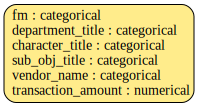

In [ ]:
metadata.visualize()

In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,fm,TVComplement,0.80526
1,department_title,TVComplement,0.74922
2,character_title,TVComplement,0.99402
3,sub_obj_title,TVComplement,0.75110
4,vendor_name,TVComplement,0.71035
5,transaction_amount,KSComplement,0.88956


In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

In [ ]:
import sdv

for col in num_attrs:
  quality_report = sdv.evaluation.single_table.evaluate_quality(train, synthetic_data, metadata)
  fig = sdv.evaluation.single_table.get_column_plot(
      real_data=train,
      synthetic_data=synthetic_data,
      metadata=metadata,
      column_name=col
  )

  fig.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 11.86it/s]|
Column Shapes Score: 81.66%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 23.18it/s]|
Column Pair Trends Score: 67.43%

Overall Score (Average): 74.55%



In [ ]:
from sdmetrics.single_column import BoundaryAdherence
from sdmetrics.single_column import RangeCoverage

for i in num_attrs:
    print(i +  " " +
    str(BoundaryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
       + ", RangeCoverage  " +
          str(RangeCoverage.compute(
              real_data=train[i],
        synthetic_data=synthetic_data[i]
          )) )

transaction_amount 1.0, RangeCoverage  0.030542684502639306


In [ ]:
from sdmetrics.single_column import CategoryAdherence
from sdmetrics.single_column import CategoryCoverage

for i in cat_attrs:
    print(i +  " CategoryAdherence" +
    str(CategoryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
    + ", CategoryCoverage : " + str(CategoryCoverage.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    )))


fm CategoryAdherence1.0, CategoryCoverage : 1.0
department_title CategoryAdherence1.0, CategoryCoverage : 0.9137931034482759
character_title CategoryAdherence1.0, CategoryCoverage : 0.8333333333333334
sub_obj_title CategoryAdherence1.0, CategoryCoverage : 0.8904761904761904
vendor_name CategoryAdherence1.0, CategoryCoverage : 0.6972229048906365


In [ ]:
from sklearn.model_selection import train_test_split

test = data[cat_attrs+num_attrs].copy()
test['fm'] = test['fm'].astype(str)
test = test[~test.index.isin(train.index)]
for cat in cat_attrs:
    test = test[test[cat].isin(train[cat].unique())]
test = test.sample(n=30000, random_state=42)

In [ ]:
'''
Compute Utility Score
'''

from sdmetrics.single_table import  LinearRegression

test_synthetic = test.copy()
for cat in cat_attrs:
    test_synthetic = test_synthetic[test_synthetic[cat].isin(synthetic_data[cat].unique())]
missed_cat_penalty =  test_synthetic.shape[0]/test.shape[0]

synthetic_data_r2 = LinearRegression.compute(
    test_data=test_synthetic,
    train_data=synthetic_data,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

real_data_r2 = LinearRegression.compute(
    test_data=test,
    train_data=train,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

print(f'Utility Score: {min(synthetic_data_r2*missed_cat_penalty/real_data_r2 , 1)}')

Utility Score: 0.04099827544448758


In [ ]:
train

,fm,department_title,character_title,sub_obj_title,vendor_name,transaction_amount
70142,12,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,15.84
146071,5,44 LAW,02 PURCHASE OF SERVICES,COURT REPORTERS 0258,ERSA COURT REPORTERS,202.25
154875,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,EMILY CHERNIACK,250.00
154799,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,GARY SANFORD SERVER,150.00
228979,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,IEH AUTO PARTS LLC,16.96
...,...,...,...,...,...,...
195545,7,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,RENTS 0285,XEROX CORPORATION,242.48
218523,9,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,LUE FRIERSON,250.00
199838,8,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,RENTS 0285,UNIFIRST,10.30
187750,7,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,FIRE LINE EQUIPMENT,160.61


In [ ]:
from sdmetrics.single_table import DCRBaselineProtection

privacy = DCRBaselineProtection.compute_breakdown(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    num_rows_subsample = 100,
    num_iterations =50
)
print(f'Privacy Score: {privacy["score"]}')

Privacy Score: 0.4375122310770558


In [ ]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    numerical_match_tolerance=0.01,
    synthetic_sample_size=3000
)

0.8966666666666666